In [2]:
# NOTE: import np, pd, plotly & mpl, ruptures, openpyxl
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import ruptures as rpt
import openpyxl

In [3]:
# NOTE: Specify Path to the Workbook
file_path = 'JPMorgan Chase FS Q1-93 to Q2-24.xlsx'

## Structural Breaks

**Motivation**:
- Structural stability: time-invariance of **regression coefficients**
- unexpected change over time in the parameters of regression models, leading to huge forecasting errors and unreliability of the model in general.
- Issue was popularised by David Hendry, who argued that **lack of stability of coefficients frequently** caused forecast failure, and therefore we must **routinely test for structural stability**.
- https://en.wikipedia.org/wiki/Structural_break

**Forms of Structural Breaks**:
- Case 1: number of breaks: known/one; break points: known
- Case 2: number of breaks: known; break points: unknown;
- Case 3: number of breaks: unknown; break points: unknown;
- Case 4: breaks in (error) variance.

**Case 1: Chow Test**
- Tests for if the **coefficients** of two linear regression model are equal;
- hence it also tests the existence of a **single** structural break at a **known** location

**Case 2: CUSUM**
- Tests for if the **coefficients** of two linear regression model are equal;
- hence it also tests the existence of a **single** structural break at a **known** location

# Tutorial

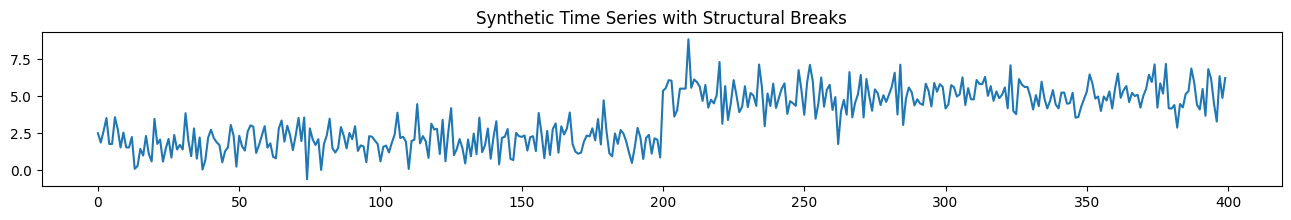

In [4]:
# Step 1: Create a synthetic time series data of 2 normal distribution with different mean(plots included)
np.random.seed(42)
n = 200
# Create two segments with different means (x is a 1d numpy.ndarray)
x = np.concatenate([np.random.normal(loc=2.0, scale=1.0, size=n), 
                    np.random.normal(loc=5.0, scale=1.0, size=n)])

plt.figure(figsize=(16, 2))
plt.plot(x)
plt.title("Synthetic Time Series with Structural Breaks")
plt.show()

In [5]:
# Step 2: Implement the Bai-Perron Test using ruptures -- Cost Function: L2 (which is the default); Method: Pelt
model = "l2"
algo = rpt.Pelt(model=model).fit(x)
breakpoints = algo.predict(pen=10)
print("Detected breakpoints at indices:", breakpoints)

Detected breakpoints at indices: [200, 400]


<Figure size 1600x200 with 0 Axes>

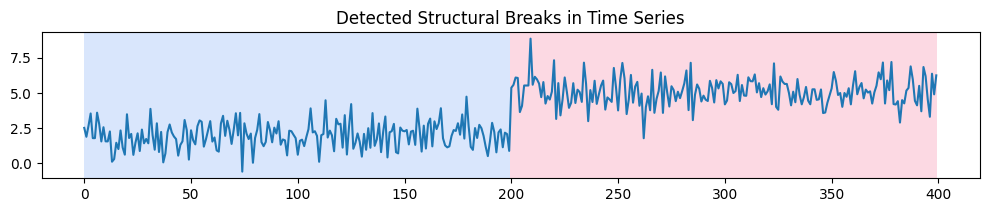

In [6]:
# Step 3: Plot the detected breakpoints
plt.figure(figsize=(16, 2))
rpt.display(x, breakpoints)
plt.title("Detected Structural Breaks in Time Series")
plt.show()

# Balance Sheet

In [7]:
# NOTE: Read a specific sheet by name OR by index (sheetname: 0 for the first sheet, 1 for the second, etc.)
bs = pd.read_excel(file_path,sheet_name='Balance Sheet',
                             #usecols=['A', 'C'], 
                             skiprows=list(range(7))+[8]+[9]+[97]+[98], 
                             na_values=['NA'])

# Removes Parentheses
bs.columns = bs.columns.str.replace(r'\n', '', regex=True)
# NOTE: replacemet must be inplace so it modifies the df DIRECTLY instead of changing it in a new dataframe
bs.replace('-', float('nan'), inplace=True) 

# Clean Column Entry
bs.columns = [bs.columns[i][-11:] if (i != 0) else (bs.columns[i]) for i in range(len(bs.columns))]

# First 6 rows EXCLUDING FIRST ROW(which is the index) = 2nd - 7th row
bs = bs.set_index('Balance Sheet as of:').transpose()
bs

Balance Sheet as of:,Cash And Equivalents,NaN,Investment Securities,Trading Asset Securities,Mortgage Backed Securities,Total Investments,NaN,Gross Loans,Allowance For Loan Losses,Other Adj. to Gross Loans,...,Full Time Employees,Filing Date,Restatement Type,Calculation Type,NaN,NaN,Currency,Exchange Rate,Conversion Method,\n \n \n \n \n
Mar-31-1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NV,FWD,NaN,NaN,USD,1,S,NaN
Jun-30-1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NV,NaN,NaN,NaN,USD,1,S,NaN
Sep-30-1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NV,NaN,NaN,NaN,USD,1,S,NaN
Dec-31-1993,17408,NaN,12692,11679,19286,43657,NaN,75858,-3020,-477,...,41567,1995-03-27 00:00:00,O,Q4,NaN,NaN,USD,1,S,NaN
Mar-31-1994,20008,NaN,12272,30493,19000,61765,NaN,75111,-2991,-450,...,41112,1995-05-15 00:00:00,NC,RUP,NaN,NaN,USD,1,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jun-30-2023,469592,NaN,722001,636996,216890,1575887,NaN,1337241,-21980,NaN,...,300066,2024-08-02 00:00:00,NC,RUP,NaN,,USD,1,S,NaN
Sep-30-2023,488231,NaN,720106,601993,216948,1539047,NaN,1348149,-21946,NaN,...,308669,2024-08-02 00:00:00,NC,RUP,NaN,,USD,1,S,NaN
Dec-31-2023,604576,NaN,645794,540607,217469,1403870,NaN,1367368,-22420,NaN,...,309926,2024-02-16 00:00:00,O,Q4,NaN,,USD,1,S,NaN
Mar-31-2024,541716,NaN,736977,754409,200129,1691515,NaN,1355190,-22351,NaN,...,311921,2024-05-01 00:00:00,O,REP,NaN,,USD,1,S,NaN


In [8]:
cash = bs['Cash And Equivalents'].to_numpy()

model = "l2"
algo = rpt.Pelt(model=model).fit(cash)
breakpoints = algo.predict(pen=10000)
print("Detected breakpoints at indices:", breakpoints)

Detected breakpoints at indices: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 126]


In [19]:
import plotly.graph_objects as go

fig = go.Figure()

# Add time series data (scatter trace)
fig.add_trace(go.Scatter(
    #x=bs.index.values,
    y=bs['Cash And Equivalents'],
    mode="lines",
    name="temperature"
))

fig.add_hline(y=200000, line_dash="dot",
              annotation_text="Jan 1, 2018 baseline", 
              annotation_position="bottom right")
for each in range(len(breakpoints)-2):
    fillcolor="black"
    if each % 2 == 0:
        fillcolor="blue"
    fig.add_vrect(x0=breakpoints[each], x1=breakpoints[each+1],
                annotation_text="", annotation_position="top left",
                fillcolor=fillcolor, opacity=0.25, line_width=0)

fig.show()
